In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("../Datasets/aug_train.csv")
df = df.drop(['enrollee_id'], axis=1)
df = df.drop(['company_type'], axis=1)
print(df.shape)
df.head()

(19158, 12)


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0.0


## Context

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

## Attribute Information

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

**target: 0 – Not looking for job change, 1 – Looking for a job change**

<AxesSubplot:xlabel='target', ylabel='count'>

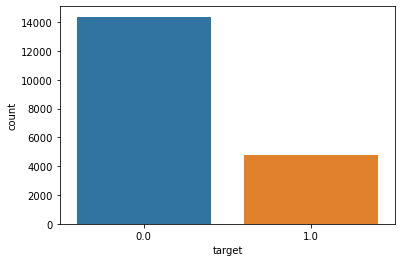

In [3]:
sns.countplot(x=df.target)

In [4]:
df.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [5]:
df.target = df.target.astype(int)
df.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
last_new_job               object
training_hours              int64
target                      int32
dtype: object

In [6]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


# Continuous variables

In [7]:
continuous_feature = []
for feature in df:
    if df.dtypes[feature] != "object" and len(df[feature].unique()) >= 10 :
        print(feature)
        continuous_feature.append(feature)

city_development_index
training_hours


Text(0.5, 1.0, 'trainingHours_target')

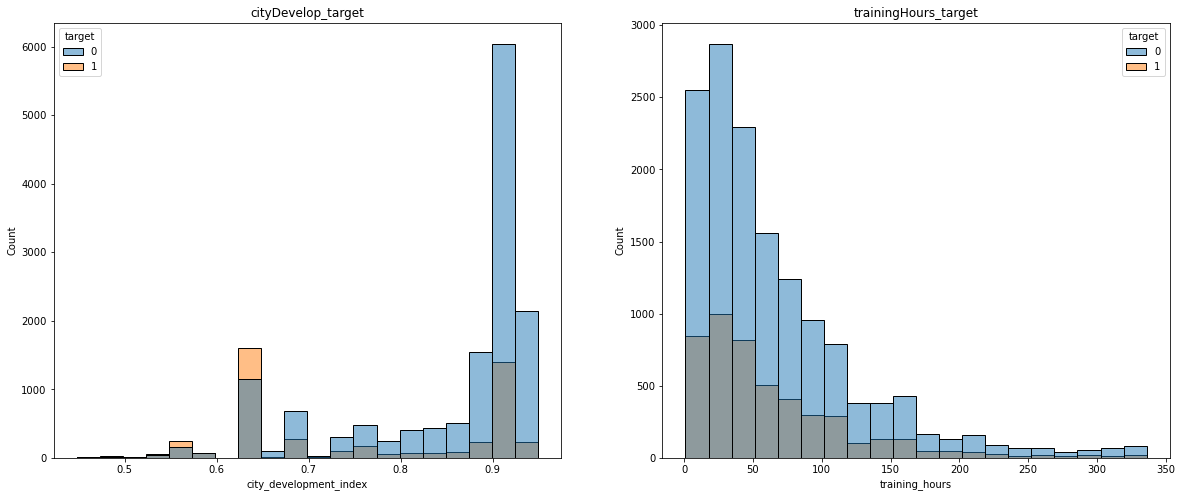

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(ax=axes[0], x=df.city_development_index, hue=df.target, bins=20)
axes[0].set_title("cityDevelop_target")

sns.histplot(ax=axes[1], x=df.training_hours, hue=df.target, bins=20)
axes[1].set_title("trainingHours_target")

**We see that the smaller the city development index is, the bigger the proportion of people wanting to change their job has.**

**The city development index has negative skewed distribution, while traning hours has the positive skewed distribution**

In [9]:
for feature in continuous_feature:
    print(f'The missing data in {feature}: {df[feature].isnull().sum()}')

The missing data in city_development_index: 0
The missing data in training_hours: 0


<AxesSubplot:xlabel='training_hours'>

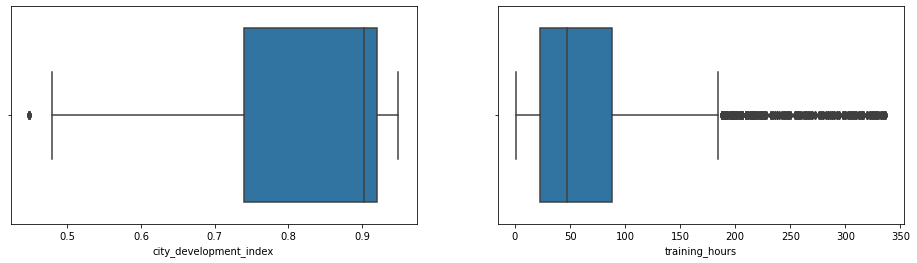

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(ax=axes[0], x=df.city_development_index)
sns.boxplot(ax=axes[1], x=df.training_hours)


# Categorical variables

In [11]:
categorical_feature = []
for feature in df:
    if feature not in continuous_feature:
        print(feature)
        categorical_feature.append(feature)

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
last_new_job
target


## city

In [12]:
print(len(df.city.unique()))
df.city.unique()

123


array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [13]:
df.city.isnull().sum()

0

**the city feature is mix-variable, we should extract city number id from it**

In [14]:
city_id = []
for id in df.city.values:

    extract = re.findall(r"\d+", id)
    city_id.append(int(extract[0]))

In [15]:
df.city = city_id
del city_id
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0
2,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0
3,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,never,52,1
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0


In [16]:
df.shape

(19158, 12)

## gender

In [17]:
df.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [18]:
print(df.gender.isnull().sum())
print(df.gender.isnull().sum()/df.shape[0])

4508
0.23530639941538783


<AxesSubplot:xlabel='gender', ylabel='count'>

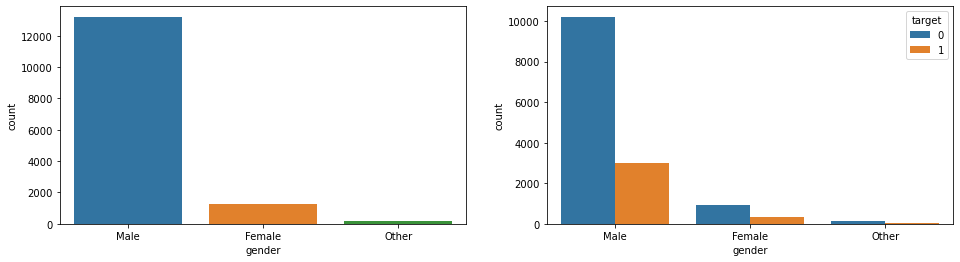

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.gender, ax=axes[0])
sns.countplot(x=df.gender, hue=df.target, ax=axes[1])

**The missing data in gender feature have 23.5% in total, so we will replace nan data by missing indicator, that means i will replace nandata by value "Missing"**

In [20]:
df['gender'] = df['gender'].fillna("Missing")

In [21]:
df.gender.unique()

array(['Male', 'Missing', 'Female', 'Other'], dtype=object)

In [22]:
onehot_gender = pd.get_dummies(df.gender.values)
onehot_gender = onehot_gender.rename(columns={"Female": "gender_female", "Male": "gender_male", 'Missing':"gender_missing", "Other": "gender_other"})


In [23]:
df = pd.concat([df, onehot_gender], axis=1).drop(['gender'], axis=1)
del onehot_gender

In [24]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_female,gender_male,gender_missing,gender_other
0,103,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1,0,1,0,0
1,40,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0,0,1,0,0
2,21,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0,0,0,1,0
3,115,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,never,52,1,0,0,1,0
4,162,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0,0,1,0,0


In [25]:
df.shape

(19158, 15)

# relevent_experience

In [26]:
df.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [27]:
df.relevent_experience.isnull().sum()

0

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

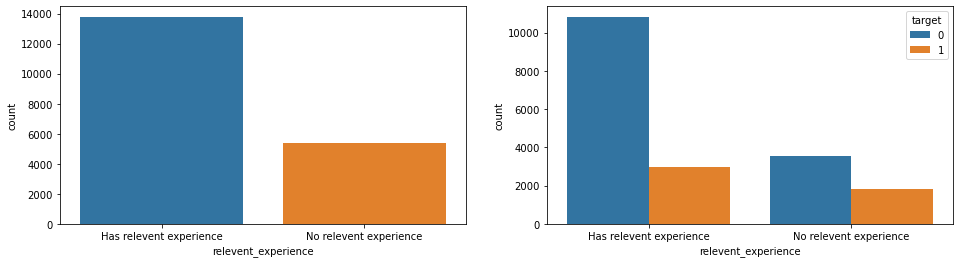

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.relevent_experience, ax=axes[0])
sns.countplot(x=df.relevent_experience, hue=df.target, ax=axes[1])

In [29]:
df.relevent_experience = df.relevent_experience.map({'Has relevent experience': 1, 'No relevent experience': 0})
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_female,gender_male,gender_missing,gender_other
0,103,0.920,1,no_enrollment,Graduate,STEM,>20,NaN,1,36,1,0,1,0,0
1,40,0.776,0,no_enrollment,Graduate,STEM,15,50-99,>4,47,0,0,1,0,0
2,21,0.624,0,Full time course,Graduate,STEM,5,NaN,never,83,0,0,0,1,0
3,115,0.789,0,NaN,Graduate,Business Degree,<1,NaN,never,52,1,0,0,1,0
4,162,0.767,1,no_enrollment,Masters,STEM,>20,50-99,4,8,0,0,1,0,0


# enrolled_university

In [30]:
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [31]:
print(df.enrolled_university.isnull().sum())
print(df.enrolled_university.isnull().sum()/df.shape[0])

386
0.020148240943731077


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

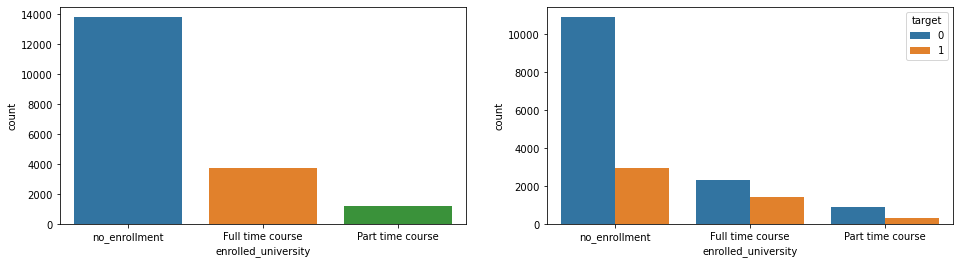

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.enrolled_university, ax=axes[0])
sns.countplot(x=df.enrolled_university, hue=df.target, ax=axes[1])

**The missing data just occupies 2%, and value "no_enrollment" is dominent over all values, so we will use mode imputation for enrolled_university feature**

In [33]:
df.shape

(19158, 15)

In [34]:
df.enrolled_university.mode().iloc[0]

'no_enrollment'

In [35]:
df.enrolled_university = df.enrolled_university.fillna(df.enrolled_university.mode().iloc[0])
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

**I will use integers encoding for this feature, because this feature is ordered**

In [36]:
temp = {'no_enrollment': 3, 'Part time course': 2, 'Full time course': 1}
df.enrolled_university = df.enrolled_university.map(temp)
del temp

In [37]:
print(df.shape)
df.head()

(19158, 15)


,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_female,gender_male,gender_missing,gender_other
0,103,0.920,1,3,Graduate,STEM,>20,NaN,1,36,1,0,1,0,0
1,40,0.776,0,3,Graduate,STEM,15,50-99,>4,47,0,0,1,0,0
2,21,0.624,0,1,Graduate,STEM,5,NaN,never,83,0,0,0,1,0
3,115,0.789,0,3,Graduate,Business Degree,<1,NaN,never,52,1,0,0,1,0
4,162,0.767,1,3,Masters,STEM,>20,50-99,4,8,0,0,1,0,0


# education_level

In [38]:
df.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [39]:
print(df.education_level.isnull().sum())
print(df.education_level.isnull().sum() / df.shape[0])

460
0.02401085708320284


<AxesSubplot:xlabel='education_level', ylabel='count'>

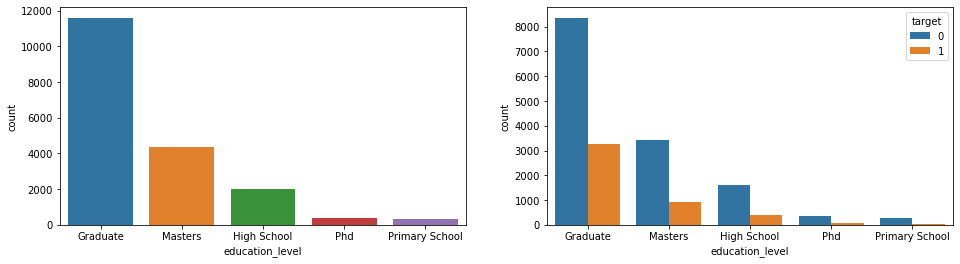

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.education_level, ax=axes[0])
sns.countplot(x=df.education_level, hue=df.target, ax=axes[1])

**The missing data just occupies 2%, and value "graduate" is dominent over all values, so we will use mode imputation for enrolled_university feature**

In [41]:
df.education_level = df.education_level.fillna(df.education_level.mode().iloc[0])
df.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

**I will use integers encoding for this feature, because this feature is ordered**

In [42]:
temp = {'Primary School': 5, 'High School': 4, 'Graduate': 3, 'Masters': 2, 'Phd':1}
df.education_level = df.education_level.map(temp)
del temp

In [43]:
print(df.shape)
df.head()

(19158, 15)


,city,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target,gender_female,gender_male,gender_missing,gender_other
0,103,0.920,1,3,3,STEM,>20,NaN,1,36,1,0,1,0,0
1,40,0.776,0,3,3,STEM,15,50-99,>4,47,0,0,1,0,0
2,21,0.624,0,1,3,STEM,5,NaN,never,83,0,0,0,1,0
3,115,0.789,0,3,3,Business Degree,<1,NaN,never,52,1,0,0,1,0
4,162,0.767,1,3,2,STEM,>20,50-99,4,8,0,0,1,0,0


# major_discipline

In [44]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [45]:
print(df.major_discipline.isnull().sum())
print(df.major_discipline.isnull().sum() / df.shape[0])

2813
0.1468316108153252


In [46]:
df.major_discipline = df.major_discipline.fillna("Missing")
df.major_discipline.unique()

array(['STEM', 'Business Degree', 'Missing', 'Arts', 'Humanities',
       'No Major', 'Other'], dtype=object)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

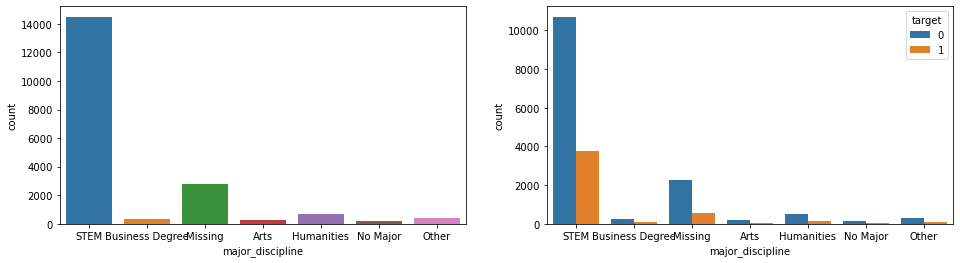

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.major_discipline, ax=axes[0])
sns.countplot(x=df.major_discipline, hue=df.target, ax=axes[1])

In [48]:
onehot_major = pd.get_dummies(df.major_discipline.values)
column_name = {"STEM": "major_STEM", "Business Degree": "major_business", 'Missing':"major_missing", "Arts": "major_arts", "Humanities": "major_humanities", "No Major": "major_noMajor", "Other": "major_other"}
onehot_major = onehot_major.rename(columns=column_name)
onehot_major.head()

,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1


In [49]:
df = pd.concat([df, onehot_major], axis=1).drop(['major_discipline'], axis=1)
del onehot_major
del column_name


In [50]:
print(df.shape)
df.head()

(19158, 21)


,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_male,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM
0,103,0.920,1,3,3,>20,NaN,1,36,1,...,1,0,0,0,0,0,0,0,0,1
1,40,0.776,0,3,3,15,50-99,>4,47,0,...,1,0,0,0,0,0,0,0,0,1
2,21,0.624,0,1,3,5,NaN,never,83,0,...,0,1,0,0,0,0,0,0,0,1
3,115,0.789,0,3,3,<1,NaN,never,52,1,...,0,1,0,0,1,0,0,0,0,0
4,162,0.767,1,3,2,>20,50-99,4,8,0,...,1,0,0,0,0,0,0,0,0,1


# experience

In [51]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [52]:
df.experience.isnull().sum()

65

<AxesSubplot:xlabel='experience', ylabel='count'>

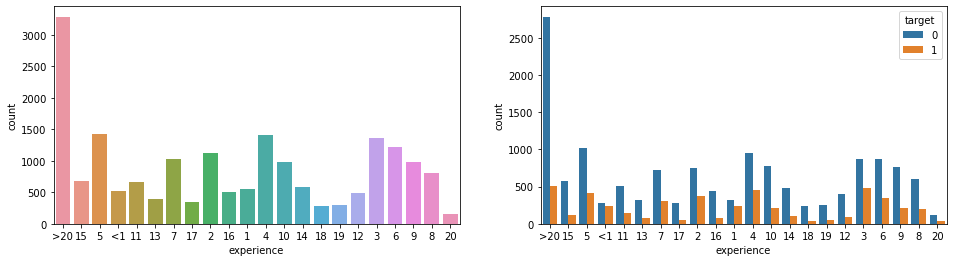

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.experience, ax=axes[0])
sns.countplot(x=df.experience, hue=df.target, ax=axes[1])

**When experince larger than 20, we label it to 21, and if smaller than 1, we label it to 0**

In [54]:
df.loc[df.experience == '>20', "experience"] = "21"
df.loc[df.experience == '<1', "experience"] = "0"
df.experience.unique()

array(['21', '15', '5', '0', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

**NaN value will be replace by -1**

In [55]:
df.loc[df.experience.isnull(), "experience"] = -1

In [56]:
df.experience = df.experience.astype(int)
df.experience.unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20, -1])

**We will replace NaN value by the median**

In [57]:
df.loc[df.experience == -1, "experience"] = df.experience.median()
df.experience.unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20])

<AxesSubplot:xlabel='experience', ylabel='count'>

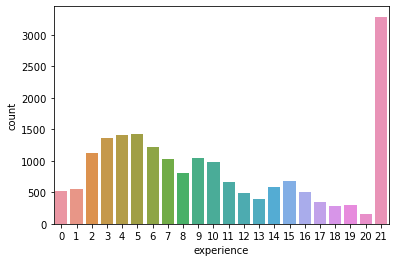

In [58]:
sns.countplot(x=df.experience)

**(We discretise experience into bins and store type into experience type feature)**

In [59]:
df.loc[df.experience < 1, "experience_type"] = 7
df.loc[(df.experience >=1) & (df.experience <= 3), "experience_type"] = 6
df.loc[(df.experience >3) & (df.experience <= 6), "experience_type"] = 5
df.loc[(df.experience >6) & (df.experience <= 10), "experience_type"] = 4
df.loc[(df.experience >10) & (df.experience <= 15), "experience_type"] = 3
df.loc[(df.experience >15) & (df.experience <= 20), "experience_type"] = 2
df.loc[df.experience > 20, "experience_type"] = 1
# df.loc[df.experience == "21"] = 21
# df.experience.unique()

In [60]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM,experience_type
0,103,0.920,1,3,3,21,NaN,1,36,1,...,0,0,0,0,0,0,0,0,1,1.0
1,40,0.776,0,3,3,15,50-99,>4,47,0,...,0,0,0,0,0,0,0,0,1,3.0
2,21,0.624,0,1,3,5,NaN,never,83,0,...,1,0,0,0,0,0,0,0,1,5.0
3,115,0.789,0,3,3,0,NaN,never,52,1,...,1,0,0,1,0,0,0,0,0,7.0
4,162,0.767,1,3,2,21,50-99,4,8,0,...,0,0,0,0,0,0,0,0,1,1.0


<AxesSubplot:xlabel='experience_type', ylabel='count'>

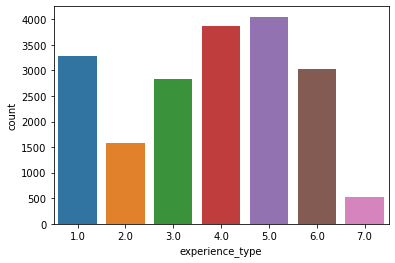

In [61]:
sns.countplot(x=df.experience_type)

# company_size

In [62]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [63]:
print(df.company_size.isnull().sum())
print(df.company_size.isnull().sum() / df.shape[0])

5938
0.3099488464349097


<AxesSubplot:xlabel='company_size', ylabel='count'>

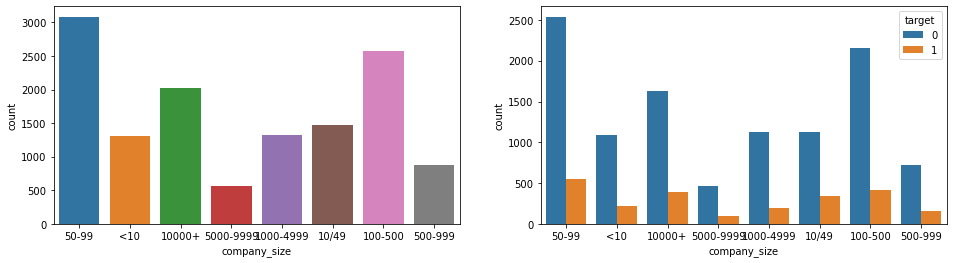

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.company_size, ax=axes[0])
sns.countplot(x=df.company_size, hue=df.target, ax=axes[1])

In [65]:
df.loc[df.company_size.isnull(), "company_size"] = -1
df.company_size.unique()

array([-1, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [66]:
df.loc[df.company_size == "10000+", "company_size"] = 1
df.loc[df.company_size == "5000-9999", "company_size"] = 2
df.loc[df.company_size == "1000-4999", "company_size"] = 3
df.loc[df.company_size == "500-999", "company_size"] = 4
df.loc[df.company_size == "100-500", "company_size"] = 5
df.loc[df.company_size == "50-99", "company_size"] = 6
df.loc[df.company_size == "10/49", "company_size"] = 7
df.loc[df.company_size == "<10", "company_size"] = 8
df.loc[df.company_size == -1, "company_size"] = 9

df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM,experience_type
0,103,0.920,1,3,3,21,9,1,36,1,...,0,0,0,0,0,0,0,0,1,1.0
1,40,0.776,0,3,3,15,6,>4,47,0,...,0,0,0,0,0,0,0,0,1,3.0
2,21,0.624,0,1,3,5,9,never,83,0,...,1,0,0,0,0,0,0,0,1,5.0
3,115,0.789,0,3,3,0,9,never,52,1,...,1,0,0,1,0,0,0,0,0,7.0
4,162,0.767,1,3,2,21,6,4,8,0,...,0,0,0,0,0,0,0,0,1,1.0


In [67]:
df.company_size = df.company_size.astype(int)

# last_new_job

In [68]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [69]:
print(df.last_new_job.isnull().sum())
print(df.last_new_job.isnull().sum() / df.shape[0])

423
0.02207954901346696


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

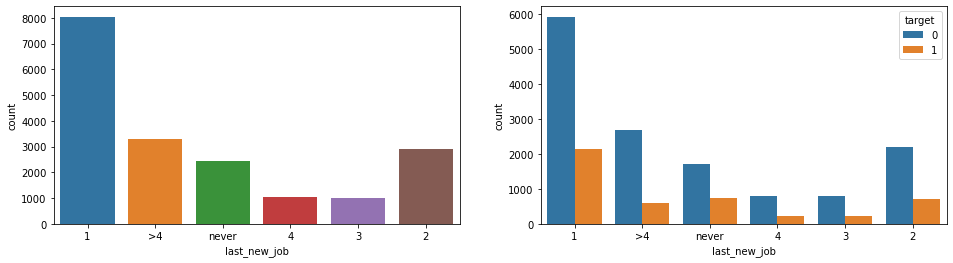

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.last_new_job, ax=axes[0])
sns.countplot(x=df.last_new_job, hue=df.target, ax=axes[1])

In [71]:
df.loc[df.last_new_job == ">4", "last_new_job"] = "5"
df.loc[df.last_new_job == "never", "last_new_job"] = "0"
df.loc[df.last_new_job.isnull(), "last_new_job"] = df.last_new_job.mode()[0]
df.last_new_job.unique()

array(['1', '5', '0', '4', '3', '2'], dtype=object)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

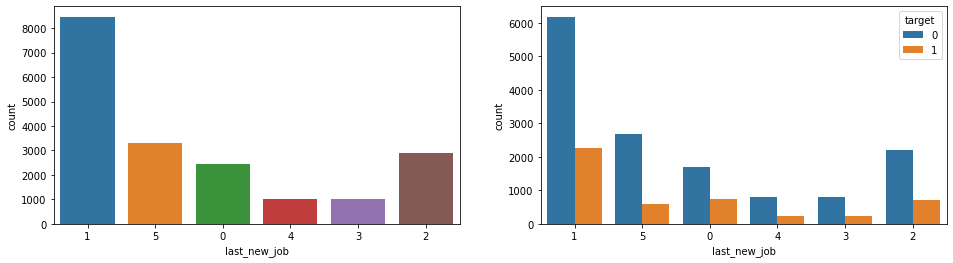

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(x=df.last_new_job, ax=axes[0])
sns.countplot(x=df.last_new_job, hue=df.target, ax=axes[1])

In [73]:
df.last_new_job = df.last_new_job.astype(int)

In [74]:
df.dtypes

city                        int64
city_development_index    float64
relevent_experience         int64
enrolled_university         int64
education_level             int64
experience                  int32
company_size                int32
last_new_job                int32
training_hours              int64
target                      int32
gender_female               uint8
gender_male                 uint8
gender_missing              uint8
gender_other                uint8
major_arts                  uint8
major_business              uint8
major_humanities            uint8
major_missing               uint8
major_noMajor               uint8
major_other                 uint8
major_STEM                  uint8
experience_type           float64
dtype: object

In [75]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM,experience_type
0,103,0.920,1,3,3,21,9,1,36,1,...,0,0,0,0,0,0,0,0,1,1.0
1,40,0.776,0,3,3,15,6,5,47,0,...,0,0,0,0,0,0,0,0,1,3.0
2,21,0.624,0,1,3,5,9,0,83,0,...,1,0,0,0,0,0,0,0,1,5.0
3,115,0.789,0,3,3,0,9,0,52,1,...,1,0,0,1,0,0,0,0,0,7.0
4,162,0.767,1,3,2,21,6,4,8,0,...,0,0,0,0,0,0,0,0,1,1.0


# Varible Transformation

In [76]:
df.training_hours = np.log(df.training_hours)

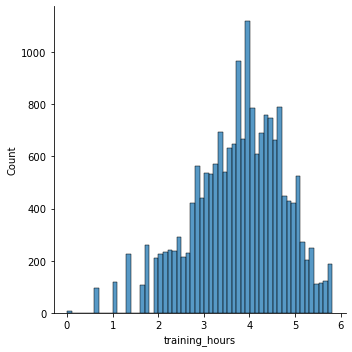

In [79]:
sns.displot(x=df.training_hours)

In [78]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM,experience_type
0,103,0.920,1,3,3,21,9,1,3.583519,1,...,0,0,0,0,0,0,0,0,1,1.0
1,40,0.776,0,3,3,15,6,5,3.850148,0,...,0,0,0,0,0,0,0,0,1,3.0
2,21,0.624,0,1,3,5,9,0,4.418841,0,...,1,0,0,0,0,0,0,0,1,5.0
3,115,0.789,0,3,3,0,9,0,3.951244,1,...,1,0,0,1,0,0,0,0,0,7.0
4,162,0.767,1,3,2,21,6,4,2.079442,0,...,0,0,0,0,0,0,0,0,1,1.0


# Detect Outliers

<AxesSubplot:xlabel='training_hours'>

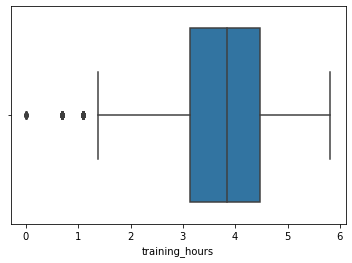

In [80]:
sns.boxplot(x=df.training_hours)

In [81]:
df.training_hours.describe()

count    19158.000000
mean         3.762026
std          0.986980
min          0.000000
25%          3.135494
50%          3.850148
75%          4.477337
max          5.817111
Name: training_hours, dtype: float64

In [84]:
def detect_oulier(feature):
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    iqr = q75 - q25 
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in feature if x < lower or x > upper]
    if len(outliers) > 0 :
        return True
    else:
        return False
    
def remove_outlier(feature):
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    iqr = q75 - q25 
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in feature if x < lower or x > upper]
      
    median = feature.median()
    x = np.where((feature >upper) | (feature < lower), median, feature)
    return x

for feature in continuous_feature:
    while True:
        if detect_oulier(df[feature]):
            df[feature] = remove_outlier(df[feature])
        else:
            break

<AxesSubplot:xlabel='training_hours'>

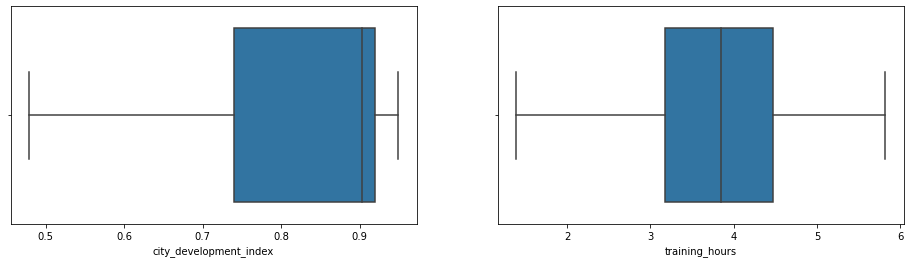

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.boxplot(x=df.city_development_index, ax=axes[0])
sns.boxplot(x=df.training_hours, ax=axes[1])

In [89]:
df.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,gender_missing,gender_other,major_arts,major_business,major_humanities,major_missing,major_noMajor,major_other,major_STEM,experience_type
0,103,0.920,1,3,3,21,9,1,3.583519,1,...,0,0,0,0,0,0,0,0,1,1.0
1,40,0.776,0,3,3,15,6,5,3.850148,0,...,0,0,0,0,0,0,0,0,1,3.0
2,21,0.624,0,1,3,5,9,0,4.418841,0,...,1,0,0,0,0,0,0,0,1,5.0
3,115,0.789,0,3,3,0,9,0,3.951244,1,...,1,0,0,1,0,0,0,0,0,7.0
4,162,0.767,1,3,2,21,6,4,2.079442,0,...,0,0,0,0,0,0,0,0,1,1.0


# Variable Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
scaler.fit(df)
train_arr = scaler.transform(df)
train_arr = np.array(train_arr)
np.save("train_data.npy", train_arr)